In [563]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [210]:
# This page aims to reconstruct an accurate PV of cash flows projection, and will eventually incorporate TimeStream

In [451]:
# We're going to need to cleanup the data, here's some functions to make that easier across our data sets.
def removeComma(x):
    return (float(str(x).replace(',','')))
def columnCleanup(x):
    ref = []
    for item in x.columns.values.tolist():
        if item.strip() in ref and item.strip() != item:
            x = x.drop(columns=[item])
        else:
            tmp = x[item].apply(removeComma)
            x = x.drop(columns = [item])
            x[item.strip()] = tmp
            ref.append(item.strip())
    return (x)

name,TotalAssets,CurrentAssets,CashCashEquivalentsAndShortTermInvestments,CashAndCashEquivalents,AccountsReceivable,Inventory,OtherCurrentAssets,TotalNonCurrentAssets,NetPPE,GrossPPE,...,AccountsPayable,OtherCurrentLiabilities,TotalNonCurrentLiabilitiesNetMinorityInterest,LongTermDebt,NonCurrentDeferredTaxesLiabilities,OtherNonCurrentLiabilities,StockholdersEquity,CapitalStock,RetainedEarnings,TotalLiabilities
12/31/2019,4.043360e+11,9.268900e+10,1.805500e+10,1.805500e+10,3.021600e+10,2.407100e+10,1000000.0,3.116470e+11,2.383490e+11,4.391600e+11,...,2.949700e+10,1000000.0,1.342490e+11,5.577900e+10,1.452200e+10,-1000000.0,1.864760e+11,657000000.0,1.482580e+11,4.003490e+11
09/30/2019,3.957740e+11,8.618600e+10,1.541700e+10,1.541700e+10,4.069400e+10,2.324000e+10,NaN,3.095880e+11,2.369210e+11,NaN,...,4.554300e+10,-1000000.0,1.280290e+11,NaN,1.437300e+10,-1000000.0,1.886160e+11,666000000.0,1.499290e+11,3.918100e+11
06/30/2019,4.088910e+11,9.309600e+10,1.847000e+10,1.847000e+10,4.313900e+10,2.446500e+10,NaN,3.157940e+11,2.390660e+11,NaN,...,4.934700e+10,NaN,1.283200e+11,NaN,1.436800e+10,1000000.0,1.922770e+11,674000000.0,1.536440e+11,4.049140e+11
03/31/2019,4.118250e+11,9.599000e+10,2.147000e+10,2.147000e+10,4.452100e+10,2.393700e+10,NaN,3.158350e+11,2.391890e+11,NaN,...,4.887900e+10,1000000.0,1.287240e+11,NaN,1.456300e+10,-1000000.0,1.963250e+11,680000000.0,1.577910e+11,4.078940e+11
12/31/2018,3.991940e+11,9.748200e+10,2.674100e+10,2.674100e+10,2.754100e+10,2.111700e+10,NaN,3.017120e+11,2.231750e+11,4.148370e+11,...,3.035100e+10,NaN,1.188470e+11,5.368600e+10,1.483700e+10,NaN,1.986460e+11,685000000.0,1.826060e+11,3.953060e+11


['TotalAssets', 'CurrentAssets', 'CashCashEquivalentsAndShortTermInvestments', 'CashAndCashEquivalents', 'AccountsReceivable', 'Inventory', 'OtherCurrentAssets', 'TotalNonCurrentAssets', 'NetPPE', 'GrossPPE', 'AccumulatedDepreciation', 'Goodwill', 'OtherIntangibleAssets', 'OtherNonCurrentAssets', 'TotalLiabilitiesNetMinorityInterest', 'CurrentLiabilities', 'CurrentDebt', 'AccountsPayable', 'OtherCurrentLiabilities', 'TotalNonCurrentLiabilitiesNetMinorityInterest', 'LongTermDebt', 'NonCurrentDeferredTaxesLiabilities', 'OtherNonCurrentLiabilities', 'StockholdersEquity', 'CapitalStock', 'RetainedEarnings', 'TotalLiabilities']


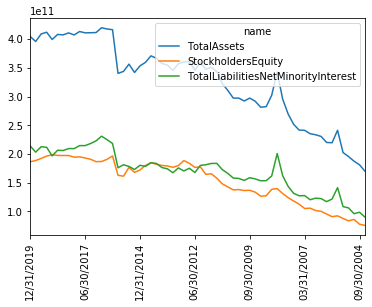

In [383]:
# First is the Balance Sheet, we need to transpose it so that the index is the date and the columns are the statement line items
# We should also clean up the column, and the data types to make them integers and not strings
BS = pd.read_csv('./RDS-Quarterly-BS.csv', index_col =0, parse_dates=[0]).transpose()
# This drops the duplicates (exact match)
BS = BS.loc[:,~BS.columns.duplicated()]
# Below drops duplicates that are differentiated by tab characters
BS = columnCleanup(BS)
# There's still a ton of NaNs in the data, because it just simply wasn't input for that field for the given quarter (from Yahoo) 
BS['TotalLiabilities'] = BS['StockholdersEquity']+BS['TotalLiabilitiesNetMinorityInterest']
display (BS.head())
print (BS.columns.values.tolist())
#print ('${:,.2f}'.format(BS['LongTermDebt'].sum()))
BS.plot(use_index = True, y = ['TotalAssets','StockholdersEquity','TotalLiabilitiesNetMinorityInterest'], rot=90)

In [452]:
# Now do the same for Cash Flows and Income Statements
CF = pd.read_csv('./RDS-Quarterly-CF.csv', index_col = 0).transpose()
# Remove the extraneous 'trailing twelve month' data since we're operating by quarter
CF = CF.drop('ttm')
CF = CF.loc[:,~CF.columns.duplicated()]
CF = columnCleanup(CF)
print (CF.columns.values.tolist())

display (CF.head())


['OperatingCashFlow', 'NetIncome', 'DepreciationAndAmortization', 'ChangeInWorkingCapital', 'ChangeInInventory', 'OtherNonCashItems', 'InvestingCashFlow', 'CapitalExpenditure', 'PurchaseOfBusiness', 'PurchaseOfInvestment', 'SaleOfInvestment', 'NetOtherInvestingChanges', 'ChangeInCashSupplementalAsReported', 'BeginningCashPosition', 'EndCashPosition', 'FreeCashFlow']


name,OperatingCashFlow,NetIncome,DepreciationAndAmortization,ChangeInWorkingCapital,ChangeInInventory,OtherNonCashItems,InvestingCashFlow,CapitalExpenditure,PurchaseOfBusiness,PurchaseOfInvestment,SaleOfInvestment,NetOtherInvestingChanges,ChangeInCashSupplementalAsReported,BeginningCashPosition,EndCashPosition,FreeCashFlow
12/31/2019,1.026500e+10,9.640000e+08,9.237000e+09,-2.033000e+09,-5.460000e+08,7.770000e+08,-4.861000e+09,-6.707000e+09,-112000000.0,-65000000.0,55000000.0,-339000000.0,2.638000e+09,1.541700e+10,1.805500e+10,3.558000e+09
09/30/2019,1.225200e+10,5.879000e+09,6.815000e+09,1.680000e+08,8.130000e+08,9.880000e+08,-2.130000e+09,-5.992000e+09,-30000000.0,NaN,NaN,-241000000.0,-3.054000e+09,1.847000e+10,1.541700e+10,6.260000e+09
06/30/2019,1.103100e+10,2.998000e+09,6.699000e+09,5.760000e+08,-6.100000e+07,9.910000e+08,-4.166000e+09,-5.150000e+09,-160000000.0,NaN,NaN,187000000.0,-3.000000e+09,2.147000e+10,1.847000e+10,5.881000e+09
03/31/2019,8.630000e+09,6.001000e+09,5.950000e+09,-3.785000e+09,-2.841000e+09,9.220000e+08,-4.622000e+09,-5.121000e+09,-441000000.0,NaN,NaN,-251000000.0,-5.271000e+09,2.674100e+10,2.147000e+10,3.509000e+09
12/31/2018,2.202100e+10,5.590000e+09,6.244000e+09,8.320000e+09,7.694000e+09,1.262000e+09,-5.312000e+09,-7.147000e+09,-208000000.0,NaN,NaN,-641000000.0,7.629000e+09,1.911200e+10,2.674100e+10,1.487400e+10


In [385]:
IS = pd.read_csv('./RDS-Quarterly-IS.csv', index_col = 0).transpose()
# Remove the extraneous 'trailing twelve month' data since we're operating by quarter
IS = IS.drop('ttm')
IS = IS.loc[:,~CF.columns.duplicated()]
IS = columnCleanup(IS)
display (IS['InterestExpense'].head())
print (IS.columns.values.tolist())


12/31/2019    2.680000e+08
09/30/2019    1.161000e+09
06/30/2019    1.252000e+09
03/31/2019    1.159000e+09
12/31/2018    9.710000e+08
Name: InterestExpense, dtype: float64

['TotalRevenue', 'CostOfRevenue', 'GrossProfit', 'OperatingExpense', 'ResearchAndDevelopment', 'SellingGeneralAndAdministration', 'OperatingIncome', 'InterestExpense', 'PretaxIncome', 'TaxProvision', 'NetIncomeContinuousOperations', 'NetIncome', 'NetIncomeCommonStockholders', 'BasicEPS']


### Let's find the Weighted-Average-Cost-of-Capital (WACC) over the past 15 years, and see if we can spot any trends
### This will also help down the line when doing cash flow projections


In [391]:
# WACC is WACC=E/V * R(e) + D/V * R(d) * (1-t)
# First, let's add a column to determine the equity and debt ratios for each year. V = total asset value
BS['DebtToValue'] = BS['TotalLiabilitiesNetMinorityInterest']/BS['TotalLiabilities']
BS['EquityToValue'] = BS['StockholdersEquity']/BS['TotalLiabilities']
display (BS[['EquityToValue','DebtToValue']].head())

name,EquityToValue,DebtToValue
12/31/2019,0.465784,0.534216
09/30/2019,0.481397,0.518603
06/30/2019,0.474859,0.525141
03/31/2019,0.481314,0.518686
12/31/2018,0.502512,0.497488


In [392]:
# Cost of debt should be relatively easy to calculate as well, net interest / total debt, pull this from the Income Statement
# Some of the data is missing though, so we'll have to fill in the gaps where there are some
# We also run into the issue where tax credits might result in negative values for interest expense for a quarter

12/31/2019    0.406757
09/30/2019    1.762108
06/30/2019    1.900223
03/31/2019    1.759072
12/31/2018    1.546228
Name: EffectiveInterestRates, dtype: float64

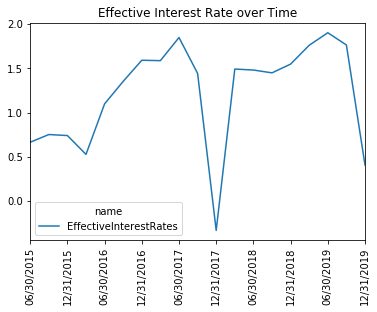

In [393]:
# Looks like there's a lot of NaNs. That's likely because either the interest payment is missing for that quarter from the data
# Let's backfill this with latest values just to keep things simpler
BS['CurrentDebt'] = BS['CurrentDebt'].ffill()
BS['LongTermDebt'] = BS['LongTermDebt'].ffill()
BS['EffectiveInterestRates'] = (IS['InterestExpense']/(BS['CurrentDebt']+BS['LongTermDebt'])*100)
# The graph below shows the change in interest payments over the last 5 years, against the European Central Bank's Interest Rates
# In Q12016, the ECB lowered their interest rates to effectively 0, which may explain why debt appears to be cheaper for them
display (BS['EffectiveInterestRates'].head())
BS['ECBInterestRate'] = pd.Series
BS.reindex(index=BS.index[::-1])[['EffectiveInterestRates']][-19:].plot(rot=90, title='Effective Interest Rate over Time')

12/31/2019    1.643333
09/30/2019    2.190000
06/30/2019    2.396667
03/31/2019    2.403333
12/31/2018    2.220000
Name: FedFundsRate, dtype: float64

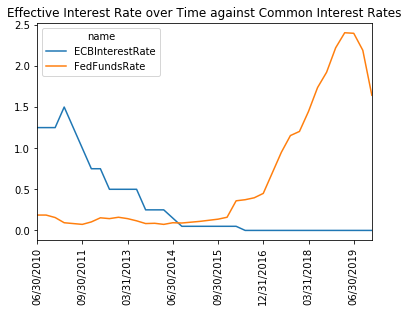

In [394]:
InterestRates = pd.read_excel('./InterestRates.xlsx')
BS['ECBInterestRate'] = InterestRates['ECB'].values*100
BS['FedFundsRate'] = InterestRates['FED'].values[::-1]
display (BS['FedFundsRate'].head())

BS.reindex(index=BS.index[::-1])[['ECBInterestRate', 'FedFundsRate']][-38:].plot(rot=90, title='Effective Interest Rate over Time against Common Interest Rates')


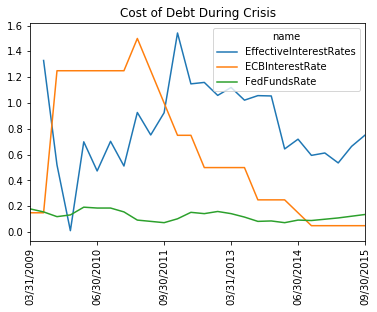

In [464]:
'''
 the other factor in projecting interest rate is risk factor (ratings agencies). Shell has consistently had a Aa2 rating
 from Moodys, so we should factor in a spread on the interest rate there as well. 
 While outlook was changed to negative by both S&P and Moodys, credit ratings are still strong (prime)
 It'll be useful to look at how Shell's interest rates looked like during times of low interest rates (near 0) and
 high credit-worthiness. For this, we'll average 2009-2011
'''
BS.reindex(index=BS.index[::-1])[['EffectiveInterestRates','ECBInterestRate','FedFundsRate']][19:45].plot(rot=90, title="Cost of Debt During Crisis", legend='yo')

In [396]:
'''
# In an environment with low interest rates going forward, we'll use this time period to project the true cost of debt
# for RDS
# Since the respective interest rates control the debt market, it looks like the ECB Interest Rate has lead the
# EffectiveInterestRate by 1 quarter, which logically makes sense. RDS likely borrows from different markets depending on
# economic condition
Possible Explanation: During the financial crisis, RDS likely borrowed heavily from US markets as the Fed Funds Rate neared 0, whereas
European markets had yet to feel the reverberated effects to the degree they later would. Once the situation was flipped and 
the Fed Funds Rate surpassed the ECB's rates, RDS likely started borrowing more heavily from European lenders. 
'''
# Make this simple, assume RDS refinances/borrows from whichever market is more favorable, average the interest rates
# Of two specific eras where the interest rate was near 0% as we predict this is what near to mid term outlooks look like.
trueCostofDebt = (BS.reindex(index=BS.index[::-1])['EffectiveInterestRates'][19:45].mean()+ BS.reindex(index=BS.index[::-1])['EffectiveInterestRates'][-20:].mean())/2
print ('Effective Cost of Debt going Forward: '+str(round(trueCostofDebt,4))+'%')

Effective Cost of Debt going Forward: 1.0006%


### Now to calculate the effective tax rate. Use the same methodology, although tax rate should be a bi-product of Operating Income - Interest

12/31/2019    0.610036
09/30/2019    0.280459
06/30/2019    0.356925
03/31/2019    0.345312
12/31/2018    0.285949
Name: TaxRate, dtype: float64

Tax Rate (avg):  37.8115%


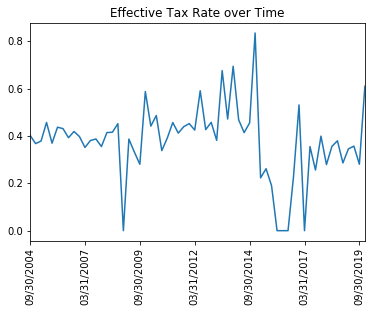

In [397]:
# Tax rate should never be greater than 1 (meant that they got back more money than they made in quarter bf of deferred tax)
def translateTax(x):
    if (x>1 or x<0):
        x = 0
    return (x)
IS['TaxRate'] = (IS['TaxProvision']/ IS['PretaxIncome']).apply(translateTax)
(IS.reindex(index=IS.index[::-1]))['TaxRate'].plot(rot = 90, title = 'Effective Tax Rate over Time')
display (IS['TaxRate'].head())
TaxRate = IS['TaxRate'].mean()
print ('Tax Rate (avg): ', str(round(TaxRate*100,4))+'%')

In [401]:
'''
#Now we need return on equity, which we'll just use the Capital Asset Pricing Model for
# R(e) = R(f) + Beta*(R(m) - R(f)
# R(f) [Risk Free Rate] is pretty easy, it's effecitvely 0 for both European and American markets at the moment.
# Beta is covaraince with S&P 500 for Shell. We'll just use what Yahoo Finance provides, 1.02. Markets are expected
# to recover slowly at the moment, so it may be difficult to determine an exact rate in the near future. For now, assume
# it's consistent at .07. Given these assumptions, we determine Beta to be .0714
'''
trueCostofEquity= .0714
WACC = BS['DebtToValue'][0] * trueCostofDebt/100 * (1-TaxRate) + BS['EquityToValue'][0] * trueCostofEquity
print ('Weighted Average Cost of Capital:',str(WACC*100)+'%')

Weighted Average Cost of Capital: 3.658128738420134%


### Our WACC is effectively 3.658%

Correlation (FreeCashFlow and Price of Oil): -0.05782975447389692
Correlation (OperatingCashFlow and Price of Oil): 0.13697179999645584


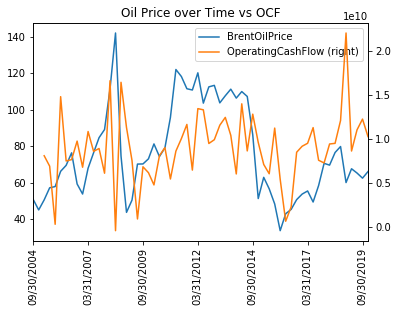

In [480]:
# Since the financial statements/Cash flows are given for the past, let's correlate them to oil prices to make it easier
# to project out future cash flows, going back 15 years.
BrentPrices=pd.read_excel('./InterestRates.xlsx', sheet_name='BrentOilPrices')
CF['BrentOilPrice'] = BrentPrices['Value'].values
print ('Correlation (FreeCashFlow and Price of Oil):', CF['BrentOilPrice'].corr(CF['FreeCashFlow']))
print ('Correlation (OperatingCashFlow and Price of Oil):', CF['BrentOilPrice'].corr(CF['OperatingCashFlow']))
ax = plt.subplot(1, 1, 1)
(CF.reindex(index=CF.index[::-1]))['BrentOilPrice'].plot(rot = 90, title = 'Oil Price over Time vs OCF', ax=ax, legend=True)
ax = CF.reindex(index=CF.index[::-1])['OperatingCashFlow'].plot(secondary_y=True, rot=90, mark_right=True, ax=ax, legend=True)
plt.show()

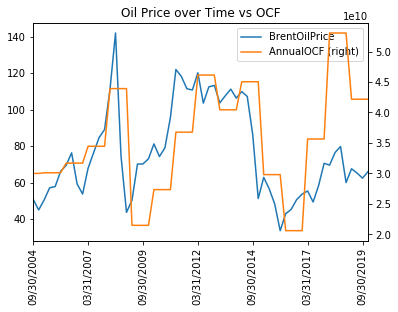

Correlation (OperatingCashFlow - Annualized and Price of Oil): 0.45071936354924436
name           BrentOilPrice     AnnualOCF
name                                      
BrentOilPrice   6.413645e+02  1.024726e+11
AnnualOCF       1.024726e+11  8.059310e+19


In [522]:
# It looks like there's a ton of variation in FCF quarter to quarter, which makes sense because of other market conditions
# and changes in the business. Let's average them for a given year. Note that OCF isn't given for first 2 quarters of dataset
# Gets the average every 4 rows (4 quarters)
tempSeries = CF['OperatingCashFlow'].groupby(np.arange(len(CF))//4).sum()
# Corrects the first two quarters in 2004 because data does not exist for them
tempSeries[15] = CF['OperatingCashFlow'][-4:-2].values.sum()*2
# Repeats each row 4 times to match original timeseries data
newDF = pd.DataFrame(np.repeat(tempSeries.values,4,axis=0))
newDF.drop(newDF.tail(2).index,inplace=True)
CF['AnnualOCF'] = newDF.values
bz = plt.subplot(1, 1, 1)
(CF.reindex(index=CF.index[::-1]))['BrentOilPrice'].plot(rot = 90, title = 'Oil Price over Time vs OCF', ax=bz, legend=True)
ax = CF.reindex(index=CF.index[::-1])['AnnualOCF'].plot(secondary_y=True, rot=90, mark_right=True, ax=bz, legend=True)
plt.show()
print ('Correlation (OperatingCashFlow - Annualized and Price of Oil):', CF['BrentOilPrice'].corr(CF['AnnualOCF']))
print (CF[['BrentOilPrice','AnnualOCF']].cov())

Annual Operating Cash Flow = 23514097449.22 + 159772735.18* Brent Oil Price Per Barrel


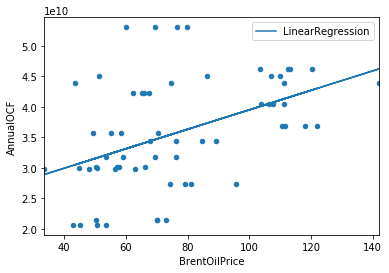

In [598]:
'''
While they are for sure related, it looks like they both follow general patterns. Interesting. Our correlation value also
rises significantly. Let's see if we can do some sort of linear regression
'''
m = np.polyfit(CF['BrentOilPrice'],CF['AnnualOCF'], 1)
print ('Annual Operating Cash Flow = '+str(round(m[1],2))+ ' + '+str(round(m[0],2))+'* Brent Oil Price Per Barrel')
grid = plt.subplot(1,1,1)
CF['LinearRegression'] = np.polyval(m, CF['BrentOilPrice'])
CF.plot(['BrentOilPrice'],'AnnualOCF','scatter',ax=grid)
CF.plot('BrentOilPrice','LinearRegression','line',ax=grid)
plt.show()

### There's a lot of variation  still, and a linear regression might not be the best fit. Try other models and see how close you can get! For now, we'll stick with this.

#### Now that we have a rudimentary method of predicting Annual Operational Cash Flow based on the price of Brent Crude Oil, let's see if we can get some good projections the price of Brent. Luckily, there's already a great way to tell us what the market thinks about the future price of Brent, the future's market!

In [599]:
# The oils future market is effectively what the market thinks the future price of oil will be, specifically the spot market. 
# This is because futures are guaranteed contracts that don't have an option to expire like traditional stock options.
# Therefore, a large quantity of buyers and sellers transacting on future prices of the same commodity, assuming no arbitrage,
# will give us the predicted future price of oil. We can use that to calculate our future OCF

In [613]:
# Future prices are as of 4/20/2020 at 5PM CST
futurePrice = pd.read_excel('./InterestRates.xlsx',sheet_name='BrentFuture',index_col=0)
ShellOCF['BrentPrice'] = futurePrice.groupby(futurePrice.index.year)['FuturePrice'].agg('mean').round(2)
print ('Annual expected price of Brent Oil')
display (ShellOCF['BrentPrice'])

Annual expected price of Brent Oil


Date
2020    32.44
2021    39.15
2022    42.60
2023    45.34
2024    47.66
2025    49.73
2026    51.64
2027    52.95
Name: FuturePrice, dtype: float64

In [615]:
def projection(x):
    return (m[1]+m[0]*x)
ShellOCF['OCF'] = ShellOCF['BrentPrice'].apply(projection)
display (ShellOCF['OCF'])

Date
2020    2.869712e+10
2021    2.976920e+10
2022    3.032042e+10
2023    3.075819e+10
2024    3.112887e+10
2025    3.145960e+10
2026    3.176476e+10
2027    3.197406e+10
Name: FuturePrice, dtype: float64

In [626]:
# Now it's finally time to bring it all down to one number. The current dollar value of future Shell Operations (next 7 years)
ShellOCFlist = ShellOCF['OCF'].tolist()
DCF = 0
for i in range (1, len(ShellOCFlist)+1):
    DCF = DCF + ShellOCFlist[i-1]/(1+WACC)**i
print ('Discounted Cash Flow: ' '${:,.2f}'.format(DCF))


Discounted Cash Flow: $209,310,226,430.08


### We managed to get down the current value of future cash flows down to one number. Nice. This mean that projects that cost more than this amount ^ probably shouldn't be taken on. There's lot of things one can do with DCF, and the number can be adjusted based on our previous assumptions (like linear relationship b/w price of Brent, what other factors have high correlation w/ OCF). For now, this will do. Next we will start doing binomial option pricing models